In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

In [2]:
listings = pd.read_csv('listings.csv')
pd.set_option('display.max_columns', None)
listings.head(2)

/Users/leilafidelino/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20200214161839,2020-02-14,Beautiful home in amazing area!,"This large, family home is located in one of T...",Visit Toronto with this fabulous furnished hom...,"This large, family home is located in one of T...",none,The apartment is located in the Ossington stri...,"To learn a little more about our home, see: (U...",All forms of public transportation are easily ...,The whole house and garden are available.,"We will be out of town, but fully accessible b...",This is our much-loved family home. We expect ...,NaN,NaN,https://a0.muscache.com/im/pictures/76206750/d...,NaN,1565,https://www.airbnb.com/users/show/1565,Alexandra,2008-08-08,"Toronto, Ontario, Canada","I live in Toronto, Canada with my husband and ...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/1565/profile_...,https://a0.muscache.com/im/users/1565/profile_...,Commercial Drive,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Toronto, ON, Canada",Little Portugal,Little Portugal,NaN,Toronto,ON,M6J,Toronto,"Toronto, Canada",CA,Canada,43.64617,-79.42451,f,House,Entire home/apt,10,3.0,5.0,7.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",1400.0,$469.00,"$2,000.00",NaN,"$1,000.00",$150.00,1,$0.00,4,730,4,4,730,730,4.0,730.0,25 months ago,t,0,0,0,0,2020-02-14,7,0,2015-07-19,2017-12-04,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.13
1,8077,https://www.airbnb.com/rooms/8077,20200214161839,2020-02-15,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,My husband and I are both artists. I give pain...,Guest room in a luxury condo with access to al...,none,NaN,NaN,NaN,NaN,NaN,No smoking please.,NaN,NaN,https://a0.muscache.com/im/pictures/11780344/1...,NaN,22795,https://www.airbnb.com/users/show/22795,Kathie & Larry,2009-06-22,"Toronto, Ontario, Canada",My husband and I have been airbnb host for alm...,within a day,100%,NaN,f,https://a0.muscache.com/im/pictures/user/9a077...,https://a0.muscache.com/im/pictures/user/9a077...,Harbourfront,2.0,2.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Toronto, ON, Canada",Downtown Toronto,Waterfront Communities-The Island,NaN,Toronto,ON,M5J,Toronto,"Toronto, Canada",CA,Canada,43.641

### Data Exploration

In [3]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23398 entries, 0 to 23397
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 18.9+ MB


In [4]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

##### The dataset has 106 features/columns.

In [5]:
# Columns to drop
drop_cols = ['id', 'listing_url','scrape_id','last_scraped',
             'name','summary','space','description', 'experiences_offered','neighborhood_overview', 
             'notes', 'interaction', 'house_rules', 
             'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 
             'host_id', 'host_url', 'host_name', 'host_location','host_about', 
             'host_thumbnail_url','host_picture_url', 'host_verifications', 
             'street', 'neighbourhood', 'neighbourhood_group_cleansed', 'city', 'state', 'market', 
             'smart_location', 'country_code', 'country', 'is_location_exact',
             'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
             'calendar_last_scraped', 'license', 'jurisdiction_names']

drop_cols2 = ['host_total_listings_count', 'host_listings_count', 'host_has_profile_pic', 'host_since', 'host_response_time', 'host_response_rate', 
              'host_acceptance_rate', 'host_neighbourhood', 'guests_included', 'bed_type', 'weekly_price', 'monthly_price', 
              'square_feet', 'has_availability', 'number_of_reviews_ltm', 'require_guest_profile_picture', 
              'require_guest_phone_verification', 'calculated_host_listings_count','calculated_host_listings_count_entire_homes',
              'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 
              'requires_license', 'is_business_travel_ready', 'first_review', 'last_review']

reviews_dropcols = ['review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin',
                    'review_scores_communication', 'review_scores_location', 'review_scores_value']

# Columns for consideration

notsure_cols = ['transit', 'access', 'calendar_updated']


In [6]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23398 entries, 0 to 23397
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 18.9+ MB


In [7]:
print('No. of columns to drop: ', len(drop_cols + drop_cols2 + reviews_dropcols + notsure_cols))

No. of columns to drop:  77


In [8]:
# list of columns to be kept for now

keep_cols = ['host_is_superhost', 'host_identity_verified', 
             'neighbourhood_cleansed', 'latitude','longitude', 
             'property_type', 'room_type', 'accommodates', 'bathrooms','bedrooms', 'beds', 'price', 
             'security_deposit', 'cleaning_fee', 'extra_people', 
             'minimum_nights', 'maximum_nights','minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
             'availability_30', 'availability_60', 'availability_90','availability_365',
             'number_of_reviews','review_scores_rating', 'instant_bookable', 'cancellation_policy', 'amenities', 'zipcode']

In [9]:
print('No. of kept columns: ', len(listings[keep_cols].columns))

No. of kept columns:  29


In [10]:
# Drop the columns not used
listings.drop(drop_cols + drop_cols2 + notsure_cols + reviews_dropcols, axis = 1,inplace=True)

In [11]:
total = listings.notnull().sum().sum()
null = listings.isnull().sum().sum()
nonNull = total -  null
print('Total data entries: ', total)
print('Number of null entries: ', null)
print('Total number of non-null entries: ', nonNull)

Total data entries:  664292
Number of null entries:  14250
Total number of non-null entries:  650042


In [12]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23398 entries, 0 to 23397
Data columns (total 29 columns):
host_is_superhost         23395 non-null object
host_identity_verified    23395 non-null object
neighbourhood_cleansed    23398 non-null object
zipcode                   23023 non-null object
latitude                  23398 non-null float64
longitude                 23398 non-null float64
property_type             23398 non-null object
room_type                 23398 non-null object
accommodates              23398 non-null int64
bathrooms                 23389 non-null float64
bedrooms                  23372 non-null float64
beds                      23245 non-null float64
amenities                 23398 non-null object
price                     23398 non-null object
security_deposit          17960 non-null object
cleaning_fee              19822 non-null object
extra_people              23398 non-null object
minimum_nights            23398 non-null int64
maximum_nights          

### Histogram of attributes

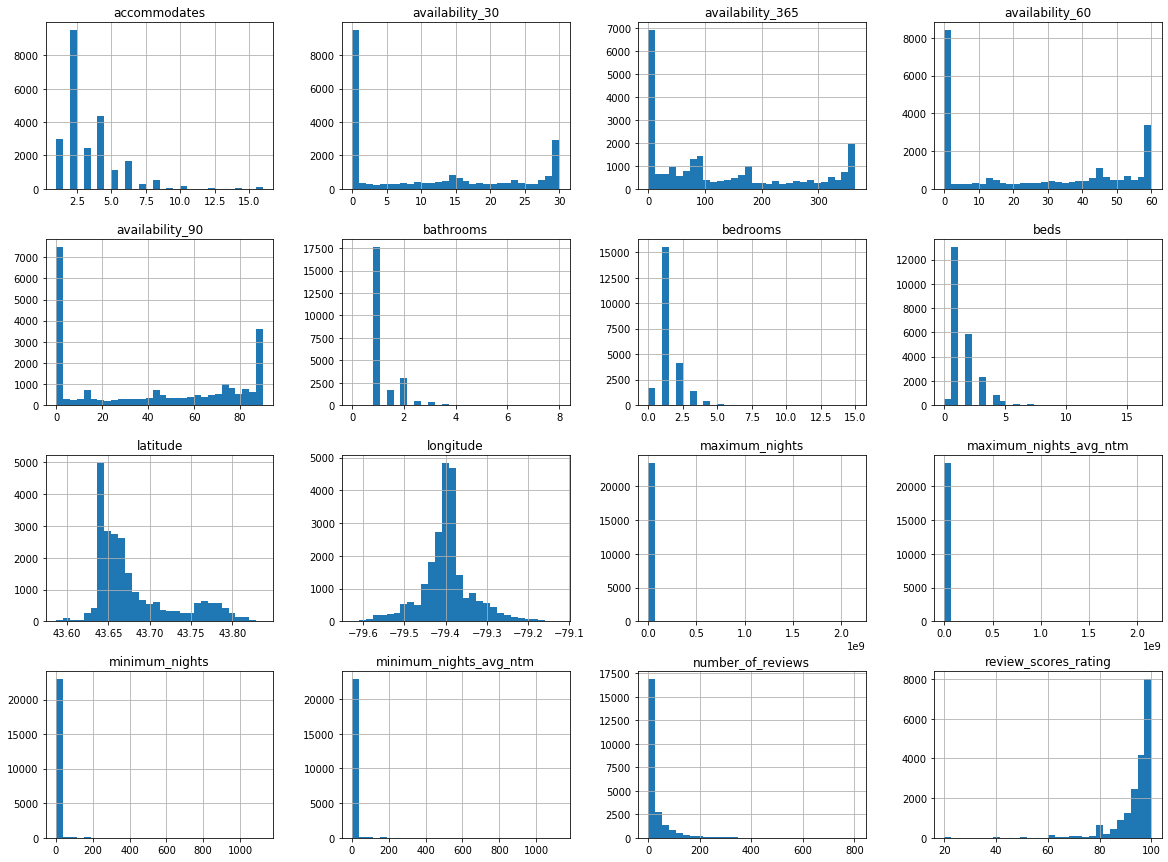

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
listings.hist(bins=30, figsize=(20,15))
plt.show();

### Data Cleaning

In [14]:
# Remove '$' on amounts

cols_with_str = ['price', 'cleaning_fee', 'security_deposit', 'extra_people']
               
for col in cols_with_str:
    listings[col] = listings[col].str.replace("\$|,",'').astype(float)

In [15]:
# zipcode
print('Nulls in zipcode attribute: ', listings.zipcode.isnull().sum())

Nulls in zipcode attribute:  375


In [16]:
# Drop rows with missing values in zipcode. 
listings = listings[listings['zipcode'].notna()]

In [17]:
# zipcode_cleaned

listings['zipcode_cleaned'] = listings['zipcode'].astype(str).str[0:2]
listings['zipcode_cleaned'] = listings['zipcode_cleaned'].apply(lambda x: x.upper())

# drop "zipcode" from original df listings
listings.drop('zipcode', axis = 1, inplace = True)

In [18]:
listings['zipcode_cleaned'].describe()

count     23023
unique       23
top          M5
freq       8271
Name: zipcode_cleaned, dtype: object

In [19]:
listings.groupby('zipcode_cleaned').size().sort_values(ascending = False)

zipcode_cleaned
M5    8271
M6    5209
M4    3700
M2    2007
M1    1617
M9     796
M3     749
M8     631
L4      13
L3      11
J4       3
[N       2
ON       2
M        2
L1       2
B2       1
2V       1
⚑        1
L5       1
M7       1
MP       1
SC       1
..       1
dtype: int64

In [20]:
# Remove rows with zipcode_cleaned not included in top 8 since these account for 98% of the data. The rest of the categories
# mostly contain few elements.

top_8 = ['M5', 'M6', 'M4', 'M2', 'M1', 'M9', 'M3', 'M8']
listings.drop(listings.loc[~listings.zipcode_cleaned.isin(top_8)].index, inplace=True)

In [21]:
# Create 'neighbourhood_listing_total' from 'neighbourhood_cleansed'
listings['neighbourhood_listing_total'] = listings.groupby('neighbourhood_cleansed')['neighbourhood_cleansed'].transform('count')
# Drop 'neighbourhood_cleansed'
listings.drop('neighbourhood_cleansed', axis =1, inplace = True)

In [22]:
listings.groupby('property_type').size().sort_values(ascending = False)

property_type
Apartment                 6566
Condominium               6443
House                     6160
Townhouse                 1009
Guest suite                984
Bungalow                   821
Loft                       426
Guesthouse                 122
Villa                      106
Serviced apartment          98
Boutique hotel              66
Other                       41
Bed and breakfast           41
Hostel                      21
Hotel                       15
Tiny house                  13
Barn                        11
Aparthotel                   7
Cottage                      7
Boat                         5
Camper/RV                    4
Cave                         3
Casa particular (Cuba)       2
Farm stay                    2
Castle                       1
Cabin                        1
Dome house                   1
Train                        1
Parking Space                1
Resort                       1
Earth house                  1
dtype: int64

In [23]:
# Remove rows with property_type not included in top 9 since this accounts for ~98% of the dataset.
# The rest of the categories have very few elements.

top_9 = ['Apartment', 'Condominium', 'House', 'Townhouse', 'Guest suite', 'Bungalow', 'Loft', 'Guesthouse']
listings.drop(index = listings.loc[~listings.property_type.isin(top_9)].index, inplace=True)

In [24]:
listings.groupby('property_type').size().sort_values(ascending = False)

property_type
Apartment      6566
Condominium    6443
House          6160
Townhouse      1009
Guest suite     984
Bungalow        821
Loft            426
Guesthouse      122
dtype: int64

In [25]:
cols_missing = listings.columns[listings.isnull().mean() > 0.2] #columns with 20% of data missing
print(set(cols_missing), 'has more than 20% of data missing')

{'security_deposit'} has more than 20% of data missing


In [26]:
# Fill missing values for security_deposit with 0.0
listings['security_deposit'].fillna(0.0, inplace=True)

In [27]:
# Fill missing values for cat_features with 'f'
listings['host_is_superhost'].fillna('f', inplace = True) 
listings['host_identity_verified'].fillna('f', inplace = True)

### Feature Engineering

In [28]:
listings['amenities'].describe()

count     22531
unique    21136
top          {}
freq         44
Name: amenities, dtype: object

Amenities has 22531 unique values. This needs to be reduced so create a new feature "amenities_score"

In [29]:
#create a new dataframe to store features in amentities column

amenities_list = list(listings.amenities)
amm_pd = pd.DataFrame(listings.index,columns=['id'])
i = 0
total_rows = amm_pd['id'].count()

for row in amenities_list:
    row_cleaned = row.replace('{', '').replace('}','').replace('"','')
    feature_list = row_cleaned.split(',')
    for feature in feature_list:
        if feature in amm_pd.columns:
            amm_pd.at[i,feature] = 1
        else:
            amm_pd[feature] = pd.Series(np.zeros(total_rows))
            amm_pd.at[i,feature] = 1
    i+=1
    
amm_pd.head(2)

,id,TV,Internet,Wifi,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,First aid kit,Fire extinguisher,Essentials,Shampoo,Cable TV,Pool,Free parking on premises,Doorman,Gym,Elevator,Buzzer/wireless intercom,Pets live on this property,Cat(s),Free street parking,Carbon monoxide detector,Lock on bedroom door,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,Self check-in,Keypad,Private entrance,Hot water,Bed linens,Extra pillows and blankets,Pocket wifi,Microwave,Coffee maker,Refrigerator,Dishes and silverware,Cooking basics,Oven,Stove,Long term stays allowed,Wheelchair accessible,Pets allowed,Building staff,Dishwasher,Single level home,Patio or balcony,Luggage dropoff allowed,Paid parking on premises,Dog(s),Host greets you,Lockbox,Changing table,High chair,Children’s books and toys,Children’s dinnerware,Garden or backyard,Cleaning before checkout,Paid parking off premises,Private living room,Breakfast,Hot tub,Safety card,Bathtub,BBQ grill,Other,Room-darkening shades,Game console,Lake access,Pack ’n Play/travel crib,Ethernet connection,Waterfront,Smart lock,Smoking allowed,Barbecue utensils,Trash can,Washer/Dryer,Suitable for events,Baby bath,Babysitter recommendations,Crib,Outlet covers,Handheld shower head,Shower gel,Stair gates,Beachfront,Firm mattress,Body soap,Bath towel,Toilet paper,Rain shower,Gas oven,Breakfast table,Formal dining area,Soaking tub,Walk-in shower,Full kitchen,Bedroom comforts,Bathroom essentials,Fireplace guards,,Heated floors,EV charger,Baking sheet,Other pet(s),Wide entrance for guests,Well-lit path to entrance,No stairs or steps to enter,Wide hallways,Flat path to guest entrance,Wide entryway,Hot water kettle,Smart TV,Sound system,Espresso machine,Netflix,Murphy bed,Fixed grab bars for toilet,Baby monitor,Disabled parking spot,Accessible-height bed,Wide entrance,Wide doorway to guest bathroom,Accessible-height toilet,Ceiling fan,Mini fridge,Balcony,Sun loungers,Shared gym,Steam oven,Convection oven,HBO GO,Memory foam mattress,High-resolution computer monitor,Central air conditioning,Beach essentials,Bread maker,Window guards,Extra space around bed,Wide clearance to shower,toilet,Printer,Amazon Echo,Pillow-top mattress,Fax machine,En suite bathroom,Outdoor seating,Mudroom,DVD player,Fire pit,Exercise equipment,Private hot tub,Shared hot tub,Outdoor parking,Heated towel rack,Terrace,Double oven,Jetted tub,Projector and screen,Kitchenette,Table corner guards,Fixed grab bars for shower,Outdoor kitchen,Warming drawer,Beach view,Wine cooler,Day bed,Bidet,Shared pool,Touchless faucets,Stand alone steam shower,Air purifier,Mountain view,Sauna,Tennis court,Pool toys,Private pool,Step-free shower,Private bathroom,Private gym,Ground floor access,Pool cover,Alfresco bathtub,Standing valet,Heat lamps,Ski-in/Ski-out,Pool with pool hoist
0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [30]:
amm_pd.shape

(22531, 196)

In [31]:
# remove features that are either very frequent (>80%), or very infrequenct (<20%)

infrequent_amenities = []
for col in amm_pd.iloc[:,1:].columns:
    if amm_pd[col].sum() < len(amm_pd)/5:
        infrequent_amenities.append(col)
    if amm_pd[col].sum() > len(amm_pd)*0.8:
        infrequent_amenities.append(col)
print(infrequent_amenities)

['Internet', 'Wifi', 'Air conditioning', 'Kitchen', 'Indoor fireplace', 'Heating', 'Washer', 'Dryer', 'Smoke detector', 'Essentials', 'Pool', 'Doorman', 'Buzzer/wireless intercom', 'Pets live on this property', 'Cat(s)', 'Free street parking', 'Carbon monoxide detector', '24-hour check-in', 'Hangers', 'translation missing: en.hosting_amenity_49', 'translation missing: en.hosting_amenity_50', 'Keypad', 'Pocket wifi', 'Wheelchair accessible', 'Pets allowed', 'Building staff', 'Single level home', 'Luggage dropoff allowed', 'Paid parking on premises', 'Dog(s)', 'Host greets you', 'Lockbox', 'Changing table', 'High chair', 'Children’s books and toys', 'Children’s dinnerware', 'Garden or backyard', 'Cleaning before checkout', 'Private living room', 'Breakfast', 'Hot tub', 'Safety card', 'Bathtub', 'BBQ grill', 'Other', 'Room-darkening shades', 'Game console', 'Lake access', 'Pack ’n Play/travel crib', 'Ethernet connection', 'Waterfront', 'Smart lock', 'Smoking allowed', 'Barbecue utensils',

In [32]:
amm_pd.drop(infrequent_amenities, axis=1, inplace=True)

In [33]:
amm_pd.shape

(22531, 30)

In [34]:
amm_pd['sum'] = amm_pd.drop('id', axis = 1).sum(axis=1)

In [35]:
# add the new column to the original listings df, then drop the "amenities" feature
listings['amenities_score'] = amm_pd['sum'] 
listings.drop('amenities', axis = 1, inplace = True)

### Check for features that are highly correlated

In [36]:
len(listings.columns)

29

In [37]:
target = ['price']
cat_features = ['host_is_superhost', 'host_identity_verified',
               'property_type', 'room_type', 'instant_bookable', 
                'cancellation_policy', 'zipcode_cleaned' ]  

In [38]:
df = listings.drop(cat_features, axis=1)
corr = df.corr()

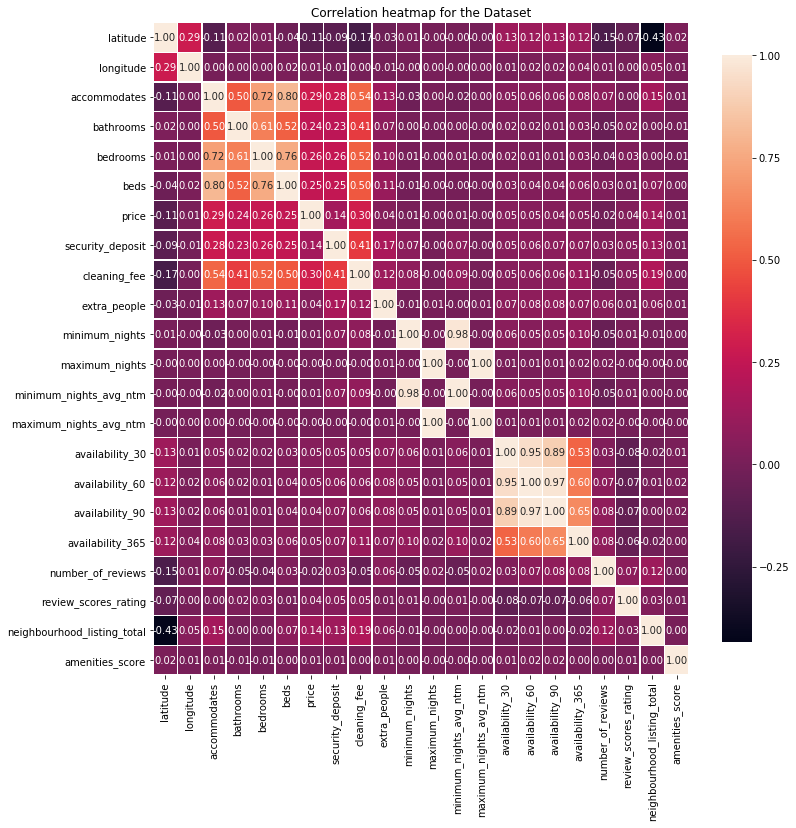

In [39]:
#Check for correlation between features

def correlation_heatmap(corr):
    fig, ax = plt.subplots(figsize=(12, 12))   
    sns.heatmap(corr, linewidth = 0.5, fmt = '0.2f', linewidths=.5, annot=True, cbar_kws={"shrink": .90})
    plt.title('Correlation heatmap for the Dataset')
    plt.show();
    
correlation_heatmap(corr)   

In [40]:
# Select only columns which meet the threshold

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.7:
            if columns[j]:
                columns[j] = False
            
selected_columns = df.columns[columns]
df_corr = df[selected_columns]

In [41]:
print("Features dropped based on correlation > threshold: ")
corr_features=[]
for i in range(len(df.columns)):
    if df.columns[i] not in df_corr.columns:
        print( df.columns[i])
        corr_features.append(df.columns[i])

Features dropped based on correlation > threshold: 
bedrooms
beds
minimum_nights_avg_ntm
maximum_nights_avg_ntm
availability_60
availability_90


In [42]:
listings.drop(corr_features, axis=1, inplace = True)

In [43]:
# Correlation of features to target variable 'price'
corr["price"].sort_values(ascending=False)

price                          1.000000
cleaning_fee                   0.301277
accommodates                   0.291245
bedrooms                       0.263545
beds                           0.252812
bathrooms                      0.240404
security_deposit               0.142890
neighbourhood_listing_total    0.141314
availability_30                0.048374
availability_60                0.048185
availability_365               0.045666
extra_people                   0.043952
availability_90                0.043041
review_scores_rating           0.041340
longitude                      0.013195
minimum_nights                 0.007050
amenities_score                0.006306
minimum_nights_avg_ntm         0.006214
maximum_nights                -0.000939
maximum_nights_avg_ntm        -0.000939
number_of_reviews             -0.020174
latitude                      -0.109406
Name: price, dtype: float64

In [44]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22531 entries, 0 to 23397
Data columns (total 23 columns):
host_is_superhost              22531 non-null object
host_identity_verified         22531 non-null object
latitude                       22531 non-null float64
longitude                      22531 non-null float64
property_type                  22531 non-null object
room_type                      22531 non-null object
accommodates                   22531 non-null int64
bathrooms                      22525 non-null float64
price                          22531 non-null float64
security_deposit               22531 non-null float64
cleaning_fee                   19143 non-null float64
extra_people                   22531 non-null float64
minimum_nights                 22531 non-null int64
maximum_nights                 22531 non-null int64
availability_30                22531 non-null int64
availability_365               22531 non-null int64
number_of_reviews              22531 non-

In [ ]:
#listings.to_csv('listings_cleaned.csv', index = True) # uncomment to create csv file

### Rank Features

In [45]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(listings, test_size=0.3, random_state=42)

In [46]:
# Categorical data

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self 
    
    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [47]:
# Use train set 
df = train_set.dropna()
target = df['price']
features_data = df.drop('price', axis = 1)

# Encode cat data
features_data = MultiColumnLabelEncoder(columns = cat_features).fit_transform(features_data)

In [48]:
#Rank importance of features
from sklearn.ensemble import RandomForestRegressor

#Prepare data

data = features_data
features = list(features_data.columns)

#Feature importance
def rankfeatures(data, features):
    rf = RandomForestRegressor(n_estimators = 100)
    rf.fit(data, target)
    print("Features sorted by their score:")
    features = pd.DataFrame((sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), features), 
             reverse=True)), columns =  ['Score','Feature'])
    print(features)

rankfeatures(data, features)

Features sorted by their score:
     Score                      Feature
0   0.2148                     latitude
1   0.1922                    longitude
2   0.0790                 accommodates
3   0.0780                 cleaning_fee
4   0.0513                property_type
5   0.0453            number_of_reviews
6   0.0405             availability_365
7   0.0401                    bathrooms
8   0.0383             security_deposit
9   0.0354         review_scores_rating
10  0.0336              amenities_score
11  0.0311  neighbourhood_listing_total
12  0.0278                    room_type
13  0.0218                 extra_people
14  0.0192               maximum_nights
15  0.0133              availability_30
16  0.0095               minimum_nights
17  0.0088            host_is_superhost
18  0.0082             instant_bookable
19  0.0051          cancellation_policy
20  0.0035       host_identity_verified
21  0.0031              zipcode_cleaned
